# 1. Einstieg in Neuronale Netzwerke in Python

In diesem Notebook lernen Sie den den Aufbau von Neuronalen Netzen mit Tensorflow und der benutzerfreundlichen [Keras-API](https://keras.io/) kennen. Der ersten Teil verschafft einen Überblick, aus welchen Komponenten ein Neuronales Netzwerk besteht. Sie lernen deren Bedeutung durch Ausführen, Verstehen und Anpassen der vorbreiteten Programmteile kennen. Erst in einem zweiten Teil werden die Netze um Convolutional Layer erweitert.

Folgende Themen sollten auf theoretischer Ebene bekannt sein:
* Aufbau eines Full-Connected-Neural-Networks (FCNN)
* Aktivierungsfunktionen 
* Optimzier und Verlustfunktionen
* Epochen und Batches
* Nachteile von FCNNs bei der Bildklassifizierung 

Sind die Grundlagen bekannt, kann es mit der Übungseinheit losgehen.

### a) Anlegen einer Conda-Env für das Juypter Notebook

Bevor Sie mit der Ausführung starten, legen Sie eine neue Anaconda-Environment mit dem Packages `Tensorflow 2.x`, `ipykernel`,`numpy` und `matplotlib` an. Hierfür kann folgender Code in der Conda-Shell ausführt werden:

`$ conda create -n Computer_Vision python=3.6 tensorflow ipykernel matplotlib numpy`

`$ conda activate Computer_Vision`

`$ python -m ipykernel install --user --name=ComputerVision`

**Das Noteboook muss anschließend mit F5 aktualisiert werden. Der Kernel kann über die Menüleiste geändert werden.**

In [ ]:
# Überprüfen der Installation
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Ausgeben der Version
tf.__version__

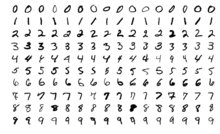

### b.1) Einfaches Netz - Training

Mit der Keras-API lässt sich ein einfaches Netz in nur wenigen Schritten erstellen.
In dem ersten Beispiel wird der [**MNIST-Datensatz**](https://en.wikipedia.org/wiki/MNIST_database) mit Bildern von handschriftlichen Ziffern verwendet. Pro Bild liegen die Grauwerte der Pixel in einer 28 x 28 Matrix vor.
 *Achtung hier wird noch keine Convolutional Layer verwendet. Jeder Pixel dient als eigenes Feature!*. 
Führen Sie den folgenden Code aus. Beantworten Sie dabei folgende Fragen:

* Welchen Wert hat die Lernrate?
* Wie viel Neuronen sind in der Input-Schicht?
* Wie viele Schichten hat das Modell insgesamt?

*Zusatzfrage:*
Was passiert wenn die Eingabedaten (x_train) nicht auf einen Bereich zwischen 0-1 normiert werden? 
Überprüfen Sie ihre Vermutung gerne durch Abwandlung und Ausführen des Codes.


**Hinweis**
Die Verlustfunktion `tf.keras.losses.SparseCategoricalCrossentropy` arbeitet mit y-Werten als Integer (Bsp. [1], [2], [1]). Alternativ kann die Verlustfunktion `tf.keras.losses.CategoricalCrossentropy` verwendet werden. Das Format der y-Werte ändert sich, diese müssen nun One-Hot-Encoded vorliegen (Bsp. [0,1,0], [0,0,2], [0,1,0])

[Mehr zum Thema](https://www.machinecurve.com/index.php/2019/10/06/how-to-use-sparse-categorical-crossentropy-in-keras/)

In [ ]:
tf.keras.backend.set_floatx('float64')

# Laden des Datensatzes
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normieren des Datensatzes (Werte zwischen 0-1)
x_train =  x_train / 255.0
x_test  =  x_test / 255.0

# Hinzufügen der Schichten in Keras
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  # Hier werden die Datenmatrix (28*28) abgeflacht
  tf.keras.layers.Dense(128, activation='relu'),  # Vollverknüpfte Schicht mit der ReLU AKtivierungsfunktionen
  tf.keras.layers.Dense(10)                       # Output-Layer für die 10 Ziffern (0-9)
])
# Anlegen einer Verlustfunktion: Kreuzentropie wegen Kategorien
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
tf.keras.losses.CategoricalCrossentropy

# Anlegen eines Optimiziers
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# Kompilieren des Modells und Auswahl des Optimizers
model.compile(optimizer=opt,
              loss=loss_fn,
              metrics=['accuracy'])

# Trainieren des Modells
model.fit(x_train, y_train, epochs=5)

### b.2) Einfaches Netz - Prediciton

Nachdem das Netz erfolgreich trainiert wurde, ist es an der Zeit unbekannte Daten vorherzusagen. Für das Training des Modells wurden die Bilder in `x_train` benutzt. Zum Überprüfen werden die ungesehen Daten in `x_test`verwendet.

**Darstellung der Trainingsdaten**

Da der MNIST-Datensatz Bilder von handschriftlichen Ziffern enthält, lassen sich die Daten sehr gut visualisieren. Pro Bild liegen die Grauwerte der Pixel vor. Diese werden mit der `matplotlib` in eine grafische Darstellung gebracht.

**Vorhersage der Wert**

Für die Vorhersage kann das trainierte Model-Objekt verwendet werden. Das Klassifizierung wird aus den Werten der Neuronen der Output-Schicht nach dem Feed-Forward der neuen Daten ermittelt. 

Mit der Softmax-Funktion wird der Vektor so tranformiert, dass die Komponenten aufsummiert 1 ergeben. Die einzelnen Werte werden so in eine Art Wahrscheinlichkeit umgewandelt. Im Gegensatz zur einfachen Berechnung $\frac{Vorhersage}{\sum Vorhersagen}$ werden hier auch negative Werte der Neuronen passend berücksichtigt ([siehe Artikel](https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d)).

**Aufgabe**

* Das reine Modellergebnis liefert nur die Vorarbeit für die Entscheidung. Finden Sie heraus welches Ergebnis gewählt wird. Geben Sie dafür den Index des höchsten Wertes im Vektor aus.

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

# Zeigen des ersten Datensatzes
first_image = x_test[3]
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# Vorhersagen des Ersten Trainingsdatensatzes
predictions = model(x_test[3:4]).numpy()
print("Vorhersage in der Rohform \n", predictions)

# Anwenden der Softmax-Funktionen 
probs = tf.nn.softmax(predictions).numpy()
print("Vorhersage als Wahrscheinlichkeit \n", probs)

##### Ergänze den Code unter dieser Zeile







### b.3) Einfaches Netz - Anpassen des Netzes

Im folgenden Schritt sollen Sie das Netz erweitern.

* Fügen Sie eine neue Schicht in das Netz mit 100 Neuronen und der ReLu-Aktivierungsfunktion ein
* Setzen Sie die Aktivierungsfunktionen  auf "Sigmoid" und trainieren Sie das Netz erneut. Was fällt Ihnen auf?
* Finden Sie die Option, um die Batch-Size einzustellen

*Zusatzaufgabe* Finden Sie die Option heraus, die Sie das Validation-Set bei der Berechnung der Genauigkeit und der Loss-Funktion verwendet lässt. Hinweis: Die Option wird bei der Kompilieren des Modells eingestellt.

In [ ]:
%%timeit -n 1 -r 1

import tensorflow as tf 
from numpy.random import seed

# Setzen des Seeds - Zur Reproduktion, da die initalen Gewichte zufällig gesetzt werden
seed(1)
tf.random.set_seed(2)


# Hinzufügen der Schichten in Keras
model_layer = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),  
    
##### Ergänze den Code unter dieser Zeile
  
 
##### Ergänze den Code über dieser Zeile    
    
  tf.keras.layers.Dense(10)                       
])

# Anlegen einer Verlustfunktion: Kreuzentropie wegen Kategorien
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Anlegen eines Optimiziers
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# Kompilieren des Modells und Zuweisen des Optimizers
model_layer.compile(optimizer=opt,
              loss=loss_fn,
              metrics=['accuracy'])

# Trainieren des Modells
model_layer.fit(x_train, y_train, epochs=5)

predictions = model_layer(x_train[:1]).numpy()
probs = tf.nn.softmax(predictions).numpy()
print("Maximum bei", np.argmax(probs[0]))

*Das benutzte model()-Objekt stammt aus dem Abschnitt b-1. Bitte führe den Abschnitt vor diesem Teil aus.*

### c) Nachteile FCNN 

Bei einer Genauigkeit von größer als 95% mit einen "einfachen" neuronalen Netzwerk bleibt die Frage offen, warum wir CNN für diesen Anwendungsfall benötigen. Die Antwort dafür liefert die Klassifizierung von leicht abgewandelten Bildern.

Dafür werden die Bilder augumentiert. D.h heißt es werden künstliche Daten durch Ändern der vorhanden Bilder geschaffen. Hierfür gibt es verschiedene Optionen, die im zweiten Teil näher vorgestellt werden.


In diesem Teil wird das Bildzentrum in die x- und y-Richtung um eine zufällige Zahl im Intervall $[-8, +8]$ verschoben. In der x-Richtung wäre -8 eine maximale Verschiebung um 8 Pixel nach links. Beispielsweise kann die Verschiebung wie folgt aussehen:

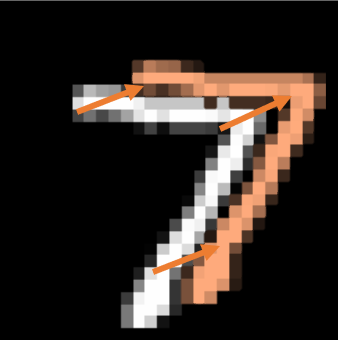

**Aufgabe**

* Führen Sie den Code aus. Was fällt Ihnen auf?
* Finden Sie eine mögliche Begründung. Bedenken Sie dabei, dass hier ein Full-Connected-Neural-Network benutzt wird.


In [ ]:
# Funktion zum Agumentieren
def augment(image):
    image = np.array(image).reshape((28, 28, 1))
    image = tf.image.resize_with_crop_or_pad(image, 36, 36) # Hinzufügen von 8 Pixeln Rahmen
    image = tf.image.random_crop(image, size=[28, 28, 1])  # Zufälliges Zurückschneiden auf 28 x 28
    return image

for i in range(10):
    # Visualisierung unverändertes Bild
    image = x_test[i]
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.title("Unverändertes Bild (Label {})".format(y_test[i]))
    plt.show()
    
    # Prognose unverändertes Bild
    predictions = model(np.array(x_test[i]).reshape(1,28,28)).numpy()
    probs = tf.nn.softmax(predictions).numpy()
    print("Prognose: \t", np.argmax(probs[0]))
    
    # Visualisierung verändertes Bild
    aug_image = augment([x_test[i]])
    pixels = np.array(aug_image).reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.title("Augmentierte Bild")
    plt.show()
    
    # Prognose verändertes Bild
    predictions = model(np.array(pixels).reshape(1,28,28)).numpy()
    probs = tf.nn.softmax(predictions).numpy()
    print("Prognose: \t", np.argmax(probs[0]))

### d) Eigenes Netz erstellen

Jetzt sind Sie an der Reihe! Erstellen Sie ein eigenes Netz (ohne Convoultional Layer). Verwenden Sie dafür den MNIST-Fashion-Datensatz. Der Datensatz wird von Zalando bereitgestellte und dient zur Klassifizierung von Kleidungsstücken.

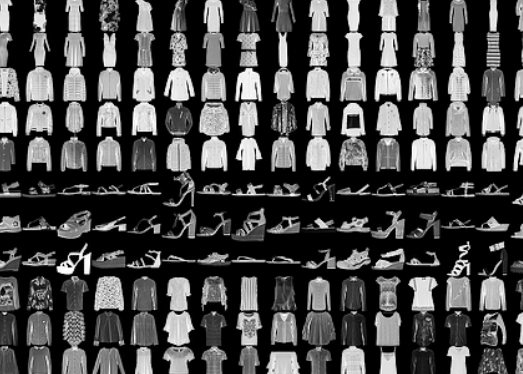


**Aufgaben**
* Normieren Sie die Pixelwert auf den Bereich (0-255)
* Entwerfen Sie ein 3-Schichten-Modell: 
  - Die *Input-Layer* muss das 2D-Bild in einen 1D-Vektor überführen. 
  - Die *Hidden-Layer* kann beliebig (aber sinnvoll!) gewählt werden.
  - Die *Output-Layer* muss in den Dimensionen mit der Zielvariable y übereinstimmen.
* Kompilieren Sie das Modell mit einem Optimizier, einer Verlustfunktion (passend zu dem Format der y-Werte!) und der Metrik 'accuracy'
* Trainieren Sie das Modell

*Zusatzaufgabe* Testen Sie ihr Modell mit den Validierungsdaten

In [ ]:
import tensorflow as tf
from numpy.random import seed
tf.keras.backend.set_floatx('float64')

# Setzen des Seeds (zufällige Initalisierung der Gewichte)
seed(56)
tf.random.set_seed(56)


# Laden der Daten
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Anlegen der Labels
labels = ["T-Shirt/Top","Hose","Pullover","Kleid","Jacke","Sandalen", "Shirt","Sneaker","Handtasche","Stiefel"]

# Visualisieren des ersten Bildes
image = 13  # Ändern zum Anzeigen eines beliebigen Bildes
pixels = x_test[image].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.title("Beispielhaftes Bild {}".format(labels[y_test[image]]))
plt.show()

##### Ergänze den Code unter dieser Zeile ###############


























